In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
data = pd.read_csv('train.csv')

In [3]:
# Define a function to preprocess the input string
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove usernames
    text = re.sub(r'@\S+', '', text)
    # Remove hashtags
    text = re.sub(r'#\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    # Remove leading/trailing whitespace
    text = text.strip()
    return text

In [4]:
data.head()

,label,text
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [5]:
data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [6]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# Load the dataset
df = pd.read_csv('train.csv')

# Split the dataframe into feature matrix and target array
X = df['text']
y = df['label']

# Reshape the feature matrix X
X = X.values.reshape(-1, 1)

# Initialize the RandomUnderSampler
rus = RandomUnderSampler()

# Fit and transform X and y
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert X_resampled back to a 1D array
X_resampled = X_resampled.reshape(-1)

# Update the dataframe with the resampled data
df_resampled = pd.DataFrame({'text': X_resampled, 'label': y_resampled})
df_resampled.head()

,text,label
0,#udtapunjab' row - shameful that #amarinder pr...,0
1,every day should be wine with lunch and good b...,0
2,sex stories sexest nude women,0
3,we are a happy family ðð ððð #ar...,0
4,#happy #monday! no #need or #reason to #feel ...,0


In [7]:
df_resampled.label.value_counts()

0    2242
1    2242
Name: label, dtype: int64

In [8]:
data=df_resampled

In [9]:
# Preprocess the data
data['text'] = data['text'].apply(preprocess_text)

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [11]:
# Define the classifiers
lr = LogisticRegression(random_state=42)
nb = MultinomialNB()
rf = RandomForestClassifier(random_state=42)

In [12]:
# Define the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [13]:
# Define the voting classifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('nb', nb), ('rf', rf)],
    voting='soft')

In [14]:
# Define the pipeline
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('voting', voting_clf)
])

In [15]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('voting',
                 VotingClassifier(estimators=[('lr',
                                               LogisticRegression(random_state=42)),
                                              ('nb', MultinomialNB()),
                                              ('rf',
                                               RandomForestClassifier(random_state=42))],
                                  voting='soft'))])

In [16]:
# Predict on the test data
y_pred = pipeline.predict(X_test)

In [17]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.778149386845039


In [18]:
# Define a function to predict the label for a given string
def predict_hate_speech(text):
    text = preprocess_text(text)
    label = pipeline.predict([text])[0]
    return label

In [19]:
# Test the function on a sample string
text = "I hate people like you"
label = predict_hate_speech(text)
print('Text:', text)
print('Label:', label)

Text: I hate people like you
Label: 1


In [20]:
text = "I love you"
label = predict_hate_speech(text)
print('Text:', text)
print('Label:', label)

Text: I love you
Label: 0


In [29]:
import joblib
joblib.dump(pipeline, 'hate_speech_model.joblib')

['hate_speech_model.joblib']

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


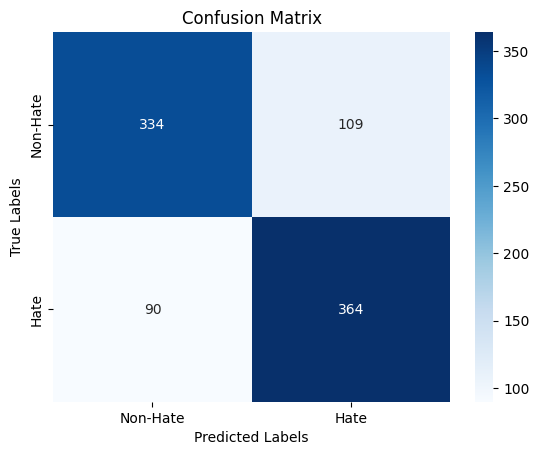

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Non-Hate', 'Hate'], yticklabels=['Non-Hate', 'Hate'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [24]:
# print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       443
           1       0.77      0.80      0.79       454

    accuracy                           0.78       897
   macro avg       0.78      0.78      0.78       897
weighted avg       0.78      0.78      0.78       897



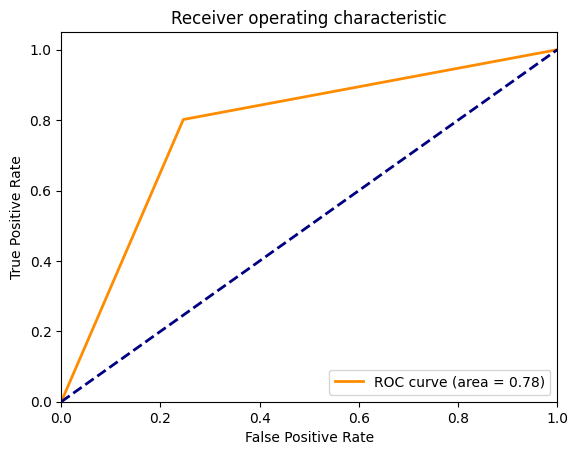

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# assuming you have already trained and tested your model and have the predicted and true labels
predicted_probs = [0.8, 0.2, 0.6, 0.1, 0.9, ...]
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


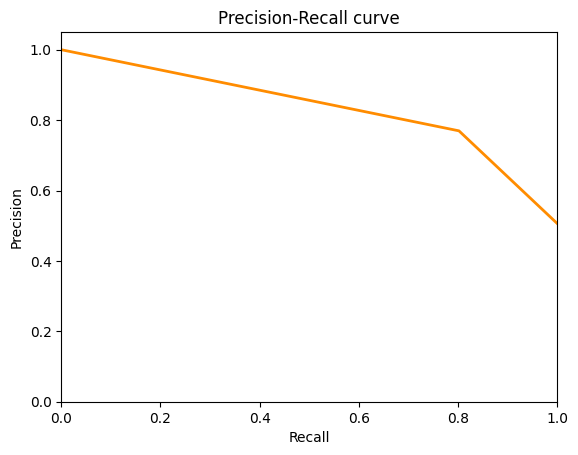

In [27]:
from sklearn.metrics import precision_recall_curve

# assuming you have already trained and tested your model and have the predicted and true labels
predicted_probs = [0.8, 0.2, 0.6, 0.1, 0.9, ...]
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()
